In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import matplotlib.pyplot as plt
import seaborn as sns


import pickle
import json

from sklearn.datasets import load_boston

## Problem Statement

## Data Gathering

In [2]:
boston_data = load_boston()
df  = pd.DataFrame(boston_data.data, columns = boston_data.feature_names)
df["PRICE"] = boston_data.target
df

C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include th

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [3]:
df.info

<bound method DataFrame.info of         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  PRICE  
0       15.3  396.90   4.98   

In [4]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

## Train_test_split

In [6]:
x = df.drop("PRICE",axis=1)
y = df["PRICE"]

In [7]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)

## Model Training

In [8]:
knn_reg = KNeighborsRegressor()
knn_reg.fit(x_train,y_train)

KNeighborsRegressor()

## Evaluation on Testing

In [9]:
y_pred = knn_reg.predict(x_test)
y_pred[1:5]

array([29.34, 14.6 , 28.96, 17.44])

In [10]:
y_test[1:5]

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11092\1841574442.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_test[1:5]


274    32.4
491    13.6
72     22.8
452    16.1
Name: PRICE, dtype: float64

#### Testing data Accuracy

In [11]:
mse = mean_squared_error(y_test,y_pred)
print("MSE: ",mse)

rmse = np.sqrt(mse)
print("RMSE: ",rmse)

mae = mean_absolute_error(y_test,y_pred)
print("MAE: ",mae)

r2_value = r2_score(y_test,y_pred)
print("R2_score: ", r2_value)

MSE:  30.94554736842105
RMSE:  5.562872222909767
MAE:  4.026315789473684
R2_score:  0.5846965270656936


## Evaluation on training

In [12]:
y_pred_train = knn_reg.predict(x_train)
y_pred_train[10:15]

array([22.48, 23.42, 30.68, 18.76, 41.88])

In [13]:
y_train[10:15]

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11092\3897609327.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_train[10:15]


110    21.7
321    23.1
265    22.8
29     21.0
262    48.8
Name: PRICE, dtype: float64

#### Training data Accuracy

In [14]:
mse = mean_squared_error(y_train,y_pred_train)
print("MSE: ",mse)

rmse = np.sqrt(mse)
print("RMSE: ",rmse)

mae = mean_absolute_error(y_train,y_pred_train)
print("MAE: ",mae)

r2_value = r2_score(y_train,y_pred_train)
print("R2_score: ", r2_value)

MSE:  29.907274576271185
RMSE:  5.468754389828747
MAE:  3.812429378531073
R2_score:  0.6597445339903338


In [15]:
r2_train_list = []
r2_test_list = []

k_values = range(2,21)
for k in k_values:
    knn_reg = KNeighborsRegressor(n_neighbors=k,p=1)
    knn_reg.fit(x_train,y_train)
    r2_train = knn_reg.score(x_train,y_train)
    r2_train_list.append(r2_train)
    r2_test = knn_reg.score(x_test,y_test)
    r2_test_list.append(r2_test)
    
print("R2_train_list: ", r2_train_list) 
print("*"*80)
print("R2_test_list: ", r2_test_list)    

R2_train_list:  [0.8422678317110016, 0.7763639814693608, 0.7464032360273241, 0.7159804045768255, 0.7209611575212005, 0.686894455573468, 0.6584155499746238, 0.6416992039752559, 0.6205272614781198, 0.5959844078354819, 0.5689056605394439, 0.5607729960926184, 0.5477262187507751, 0.5306818647501165, 0.5206770893736683, 0.5091119995229763, 0.49815324582914977, 0.4812733596001725, 0.4718115507232883]
********************************************************************************
R2_test_list:  [0.7080557773452787, 0.6669356799682569, 0.6854089722465078, 0.6820022415141848, 0.6677680084451827, 0.6283671802357105, 0.6073365926876988, 0.6102506097830468, 0.5822941853069944, 0.5783231930519102, 0.5694932644518632, 0.5591640923583219, 0.5447273676922734, 0.5314086413406811, 0.5233412488332612, 0.5232262921531481, 0.5069466262989463, 0.5016457183624169, 0.49833262381791443]


Text(0.5, 1.0, 'Comparison of train and test accuracies')

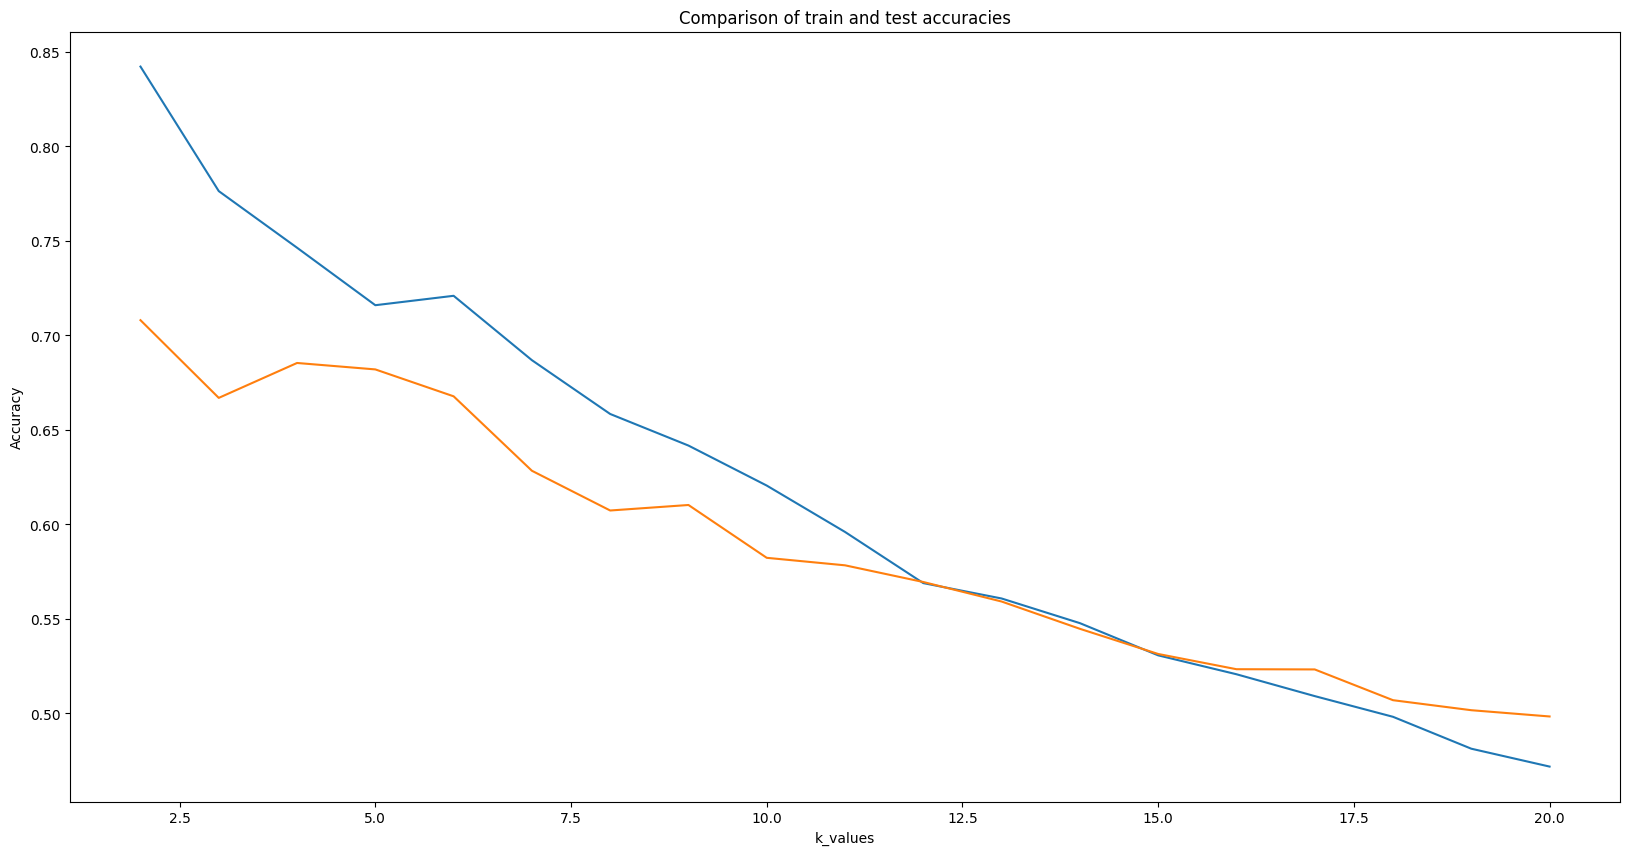

In [16]:
plt.figure(figsize=(20,10))
plt.plot(k_values,r2_train_list)
plt.plot(k_values,r2_test_list)
plt.xlabel("k_values")
plt.ylabel("Accuracy")
plt.title("Comparison of train and test accuracies")

## Model Training for k=3 and p=1

In [17]:
knn_reg = KNeighborsRegressor(n_neighbors=3,p=1)
knn_reg.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=3, p=1)

## Evaluation on testing

In [18]:
y_pred = knn_reg.predict(x_test)

In [19]:
mse = mean_squared_error(y_test,y_pred)
print("MSE: ",mse)
rmse = np.sqrt(mse)
print("RMSE: ",rmse)
mae = mean_absolute_error(y_test,y_pred)
print("MAE: ",mae)
r2_value = r2_score(y_test,y_pred)
print("R2_score: ", r2_value)

MSE:  24.817653508771926
RMSE:  4.9817319788173995
MAE:  3.6239035087719293
R2_score:  0.6669356799682569


## Evaluation on training

In [20]:
y_pred_train = knn_reg.predict(x_train)

In [21]:
mse = mean_squared_error(y_train,y_pred_train)
print("MSE: ",mse)

rmse = np.sqrt(mse)
print("RMSE: ",rmse)

mae = mean_absolute_error(y_train,y_pred_train)
print("MAE: ",mae)

r2_value = r2_score(y_train,y_pred_train)
print("R2_score: ", r2_value)

MSE:  19.656829880728186
RMSE:  4.43360235933808
MAE:  2.9685499058380413
R2_score:  0.7763639814693608


## Feature Engineering

In [22]:
x = df.drop("PRICE",axis=1)
y = df["PRICE"]

In [23]:
x_train,x_test,y_train,y_test  = train_test_split(x,y,test_size=0.30,random_state=12)

## Normalisation 

In [24]:
x_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
251,0.21409,22.0,5.86,0.0,0.4310,6.438,8.9,7.3967,7.0,330.0,19.1,377.07,3.59
465,3.16360,0.0,18.10,0.0,0.6550,5.759,48.2,3.0665,24.0,666.0,20.2,334.40,14.13
137,0.35233,0.0,21.89,0.0,0.6240,6.454,98.4,1.8498,4.0,437.0,21.2,394.08,14.59
311,0.79041,0.0,9.90,0.0,0.5440,6.122,52.8,2.6403,4.0,304.0,18.4,396.90,5.98
406,20.71620,0.0,18.10,0.0,0.6590,4.138,100.0,1.1781,24.0,666.0,20.2,370.22,23.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,0.10612,30.0,4.93,0.0,0.4280,6.095,65.1,6.3361,6.0,300.0,16.6,394.62,12.40
253,0.36894,22.0,5.86,0.0,0.4310,8.259,8.4,8.9067,7.0,330.0,19.1,396.90,3.54
390,6.96215,0.0,18.10,0.0,0.7000,5.713,97.0,1.9265,24.0,666.0,20.2,394.43,17.11
155,3.53501,0.0,19.58,1.0,0.8710,6.152,82.6,1.7455,5.0,403.0,14.7,88.01,15.02


In [25]:
x_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000
mean,3.766185,10.661017,11.271441,0.073446,0.554720,6.261226,69.643220,3.767167,9.497175,411.242938,18.557062,355.736017,12.848503
std,9.503590,22.891283,6.911165,0.261237,0.114085,0.674153,28.241787,2.107834,8.654609,167.839539,2.113887,92.588745,7.207968
min,0.009060,0.000000,0.740000,0.000000,0.385000,3.863000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.085013,0.000000,5.190000,0.000000,0.453000,5.876250,46.400000,2.107650,4.000000,284.000000,17.400000,375.377500,6.942500
50%,0.240075,0.000000,9.690000,0.000000,0.538000,6.183500,80.350000,3.092200,5.000000,334.500000,19.100000,391.305000,11.655000
75%,3.639005,0.000000,18.100000,0.000000,0.624000,6.600500,94.675000,5.116700,24.000000,666.000000,20.200000,396.322500,17.270000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [26]:
normal_scal = MinMaxScaler()
normal_scal.fit(x_train)
array = normal_scal.transform(x_train)
normal_train_df = pd.DataFrame(array,columns =x_train.columns )
normal_train_df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.002305,0.22,0.189630,0.0,0.094650,0.529617,0.061792,0.569897,0.260870,0.272901,0.691489,0.949997,0.051325
1,0.035457,0.00,0.642963,0.0,0.555556,0.389963,0.466529,0.176131,1.000000,0.914122,0.808511,0.842403,0.342163
2,0.003858,0.00,0.783333,0.0,0.491770,0.532908,0.983522,0.065491,0.130435,0.477099,0.914894,0.992889,0.354857
3,0.008782,0.00,0.339259,0.0,0.327160,0.464624,0.513903,0.137375,0.130435,0.223282,0.617021,1.000000,0.117274
4,0.232750,0.00,0.642963,0.0,0.563786,0.056561,1.000000,0.004410,1.000000,0.914122,0.808511,0.932725,0.596302


In [27]:
knn_reg = KNeighborsRegressor()
knn_reg.fit(normal_train_df,y_train)

## Evaluation on training
y_pred_train = knn_reg.predict(normal_train_df)

mse = mean_squared_error(y_train,y_pred_train)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE:",rmse)

mae = mean_absolute_error(y_train,y_pred_train)
print("MAE :",mae)

r2_value = r2_score(y_train,y_pred_train)
print("R-Squared :",r2_value)

MSE : 15.3564395480226
RMSE: 3.9187293282418216
MAE : 2.4886440677966104
R-Squared : 0.8143038935442342


In [28]:
array = normal_scal.transform(x_test)
normal_test_df = pd.DataFrame(array,columns =x_test.columns )
normal_test_df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.000318,0.00,0.164815,0.0,0.267490,0.503291,0.366632,0.484573,0.173913,0.070611,0.808511,0.981088,0.138521
1,0.150064,0.00,0.642963,0.0,0.633745,0.416290,0.945417,0.059335,1.000000,0.914122,0.808511,1.000000,0.403422
2,0.466691,0.00,0.642963,0.0,0.633745,0.343069,0.849640,0.043449,1.000000,0.914122,0.808511,0.829946,0.707781
3,0.005750,0.00,0.202222,1.0,0.251029,0.569313,0.757981,0.274477,0.304348,0.229008,0.510638,0.978693,0.215508
4,0.000453,0.33,0.053333,0.0,0.179012,0.614151,0.694130,0.186698,0.260870,0.066794,0.617021,1.000000,0.160044


In [29]:
y_pred_test = knn_reg.predict(normal_test_df)

In [30]:
## Evaluation on testing

mse = mean_squared_error(y_test,y_pred_test)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE:",rmse)

mae = mean_absolute_error(y_test,y_pred_test)
print("MAE :",mae)

r2_value = r2_score(y_test,y_pred_test)
print("R-Squared :",r2_value)

MSE : 25.691784210526322
RMSE: 5.068706364598992
MAE : 3.4210526315789473
R-Squared : 0.7071415957053846


In [32]:
r2_train_list = []
r2_test_list = []

k_values = range(2,21)
for k in k_values:
    knn_reg = KNeighborsRegressor(n_neighbors=k,p=1)
    knn_reg.fit(normal_train_df,y_train)
    r2_train = knn_reg.score(normal_train_df,y_train)
    r2_train_list.append(r2_train)
    
    r2_test = knn_reg.score(normal_test_df,y_test)
    r2_test_list.append(r2_test)
    
print("R2_train_list: ", r2_train_list)
print("*"*80)
print("R2_test_list: ", r2_test_list)


R2_train_list:  [0.9267356391822063, 0.8887822053969578, 0.8557170176955293, 0.8351783840347083, 0.8203686553878714, 0.7815059923564228, 0.7641586688098465, 0.7576290457441406, 0.7399813834114197, 0.7255899141853097, 0.7114850893160933, 0.6952838248929276, 0.6835372105154879, 0.671066587759706, 0.6652720005439333, 0.6616995219572326, 0.6559376987917739, 0.6485057411503649, 0.644996675170818]
********************************************************************************
R2_test_list:  [0.7587543873713744, 0.7574441373558647, 0.7334518478506253, 0.7425150314403315, 0.7391536945775914, 0.7452331541999543, 0.7437124394073218, 0.7433199198473704, 0.7420618496692513, 0.7257375936549924, 0.7190404777567075, 0.713567804959073, 0.7016565673395252, 0.6949726331669861, 0.6956542053134118, 0.6871178224127656, 0.6824976475978418, 0.6727746640987118, 0.6664992638194018]


In [ ]:
plt.figure(figsize=(20,10))
plt.plot(k_values,r2_train_list)
plt.plot(k_values,r2_test_list)
plt.xlabel("k_values")
plt.ylabel("Accuracy")
plt.title("Comaparison of k_values and accuracy")

In [33]:
knn_reg = KNeighborsRegressor(n_neighbors=7,p=1)
knn_reg.fit(normal_train_df,y_train)

KNeighborsRegressor(n_neighbors=7, p=1)

## Evaluation on Training

In [34]:
y_pred_train = knn_reg.predict(normal_train_df)

mse = mean_squared_error(y_train,y_pred_train)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE:",rmse)

mae = mean_absolute_error(y_train,y_pred_train)
print("MAE :",mae)

r2_value = r2_score(y_train,y_pred_train)
print("R-Squared :",r2_value)

MSE : 18.06871497751643
RMSE: 4.250731110940379
MAE : 2.72683615819209
R-Squared : 0.7815059923564228


## Evaluation on Testing

In [35]:
array = normal_scal.transform(x_test)

normal_test_df = pd.DataFrame(array,columns = x_test.columns)
normal_test_df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.000318,0.0,0.164815,0.0,0.267490,0.503291,0.366632,0.484573,0.173913,0.070611,0.808511,0.981088,0.138521
1,0.150064,0.0,0.642963,0.0,0.633745,0.416290,0.945417,0.059335,1.000000,0.914122,0.808511,1.000000,0.403422
2,0.466691,0.0,0.642963,0.0,0.633745,0.343069,0.849640,0.043449,1.000000,0.914122,0.808511,0.829946,0.707781


In [36]:
y_pred = knn_reg.predict(normal_test_df)


In [37]:
mse = mean_squared_error(y_test,y_pred)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE:",rmse)

mae = mean_absolute_error(y_test,y_pred)
print("MAE :",mae)

r2_value = r2_score(y_test,y_pred)
print("R-Squared :",r2_value)

MSE : 22.350100698174007
RMSE: 4.727589311496295
MAE : 3.2072368421052633
R-Squared : 0.7452331541999543


## Standartization

In [38]:
std_scal = StandardScaler()
std_scal.fit(x_train)

StandardScaler()

In [39]:
array = std_scal.transform(x_train)
std_train_df = pd.DataFrame(array, columns= x_train.columns)
std_train_df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.374293,0.496042,-0.784108,-0.281546,-1.085983,0.262588,-2.153872,1.724363,-0.288945,-0.484736,0.257207,0.230743,-1.286300
1,-0.063496,-0.466383,0.989446,-0.281546,0.880236,-0.746028,-0.760347,-0.332881,1.678106,1.520009,0.778312,-0.230765,0.178041
2,-0.359726,-0.466383,1.538610,-0.281546,0.608125,0.286355,1.019676,-0.910926,-0.636072,0.153680,1.252043,0.414718,0.241949
3,-0.313564,-0.466383,-0.198719,-0.281546,-0.094096,-0.206812,-0.597238,-0.535365,-0.636072,-0.639866,-0.074405,0.445219,-0.954253
4,1.786063,-0.466383,0.989446,-0.281546,0.915347,-3.153931,1.076410,-1.230045,1.678106,1.520009,0.778312,0.156655,1.457602


## Evaluation on Training

In [40]:
y_pred_train = knn_reg.predict(std_train_df)

In [41]:
mse = mean_squared_error(y_train,y_pred_train)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE:",rmse)

mae = mean_absolute_error(y_train,y_pred_train)
print("MAE :",mae)

r2_value = r2_score(y_train,y_pred_train)
print("R-Squared :",r2_value)

MSE : 42.93123083131558
RMSE: 6.55219282617015
MAE : 4.767917675544794
R-Squared : 0.4808586726240469


## evaluation on testing

In [42]:
array = std_scal.transform(x_test)
std_test_df = pd.DataFrame(array,columns = x_test.columns)
std_test_df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.392913,-0.466383,-0.881190,-0.281546,-0.348651,0.072451,-1.104296,1.278584,-0.520363,-1.117186,0.778312,0.364101,-0.847275
1,1.010902,-0.466383,0.989446,-0.281546,1.213791,-0.555891,0.888479,-0.943089,1.678106,1.520009,0.778312,0.445219,0.486469
2,3.979177,-0.466383,0.989446,-0.281546,1.213791,-1.084709,0.558714,-1.026088,1.678106,1.520009,0.778312,-0.284194,2.018886


In [43]:
y_pred = knn_reg.predict(std_test_df)


mse = mean_squared_error(y_test,y_pred)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE:",rmse)

mae = mean_absolute_error(y_test,y_pred)
print("MAE :",mae)

r2_value = r2_score(y_test,y_pred)
print("R-Squared :",r2_value)

MSE : 45.84258324382384
RMSE: 6.770715120563251
MAE : 5.185526315789474
R-Squared : 0.47744439749619505


r2_train_list:
 [0.9287870761275936, 0.8989546181201291, 0.8685347410808634, 0.8435096330957075, 0.8282940312008443, 0.8034239675731132, 0.7853490562087078, 0.7752382128617695, 0.7646447213196198, 0.7487163185056025, 0.7422422538904887, 0.7345677126640501, 0.7243733536955422, 0.7223104370012603, 0.714439792528349, 0.7072639165777904, 0.7003120441219894, 0.6985345328836481, 0.695283836292837]

r2_test_list:
 [0.8207927820411512, 0.7909208606845003, 0.7828400742174598, 0.77719292352305, 0.7875215807744733, 0.7785786162400544, 0.7871119831271621, 0.7793019875250363, 0.778294275965258, 0.7770740148657234, 0.770815653516244, 0.7609059121674345, 0.7520921338518105, 0.7413889255260191, 0.7414206873139767, 0.7345645404243357, 0.7287361998744291, 0.7181219907807403, 0.7124788365870304]


Text(0, 0.5, 'Accuracy')

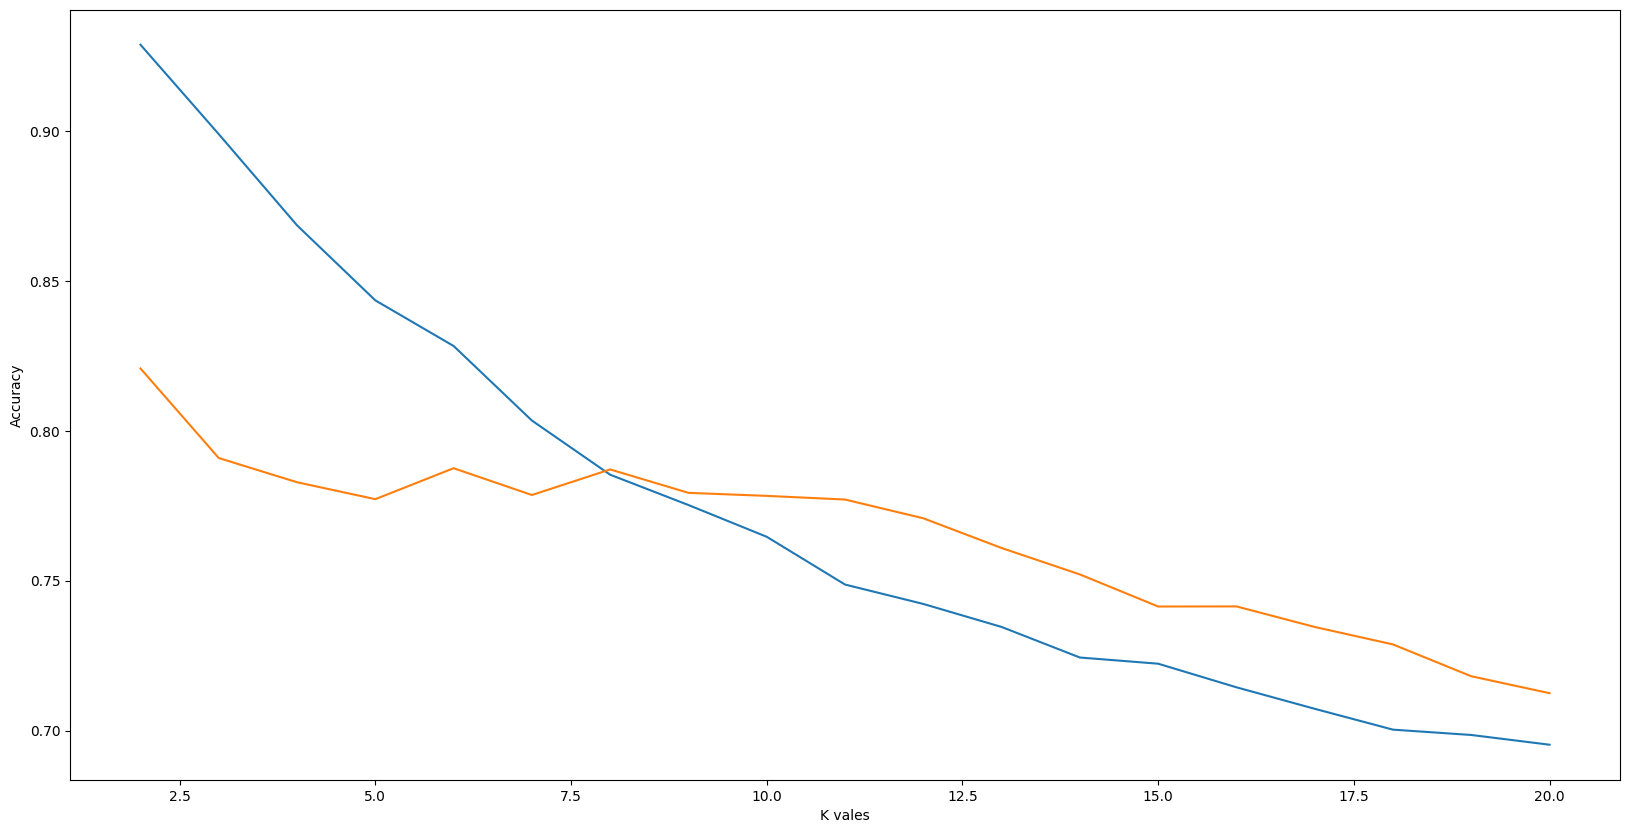

In [44]:
r2_train_list = []
r2_test_list = []
k_values = range(2,21)
for k in k_values:
    knn_reg = KNeighborsRegressor(n_neighbors=k,p=1)
    knn_reg.fit(std_train_df,y_train)
    r2_train = knn_reg.score(std_train_df,y_train)
    r2_train_list.append(r2_train)
    
    r2_test = knn_reg.score(std_test_df,y_test)
    r2_test_list.append(r2_test)
    
print("r2_train_list:\n",r2_train_list )
print()
print("r2_test_list:\n",r2_test_list)


plt.figure(figsize=(20,10))
plt.plot(k_values,r2_train_list)
plt.plot(k_values,r2_test_list)
plt.xlabel("K vales")
plt.ylabel("Accuracy")

In [45]:
knn_reg = KNeighborsRegressor(n_neighbors=8,p=1)
knn_reg.fit(std_train_df,y_train)

KNeighborsRegressor(n_neighbors=8, p=1)

## Evaluation on Training

In [46]:
y_pred_train = knn_reg.predict(std_train_df)

mse = mean_squared_error(y_train,y_pred_train)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE:",rmse)

mae = mean_absolute_error(y_train,y_pred_train)
print("MAE :",mae)

r2_value = r2_score(y_train,y_pred_train)
print("R-Squared :",r2_value)

MSE : 17.750906603107342
RMSE: 4.213182479208246
MAE : 2.556850282485876
R-Squared : 0.7853490562087078


## Evaluation on testing

In [47]:
array = std_scal.transform(x_test)
std_test_df = pd.DataFrame(array,columns = x_test.columns)

In [48]:
y_pred = knn_reg.predict(std_test_df)

mse = mean_squared_error(y_test,y_pred)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE:",rmse)

mae = mean_absolute_error(y_test,y_pred)
print("MAE :",mae)

r2_value = r2_score(y_test,y_pred)
print("R-Squared :",r2_value)

MSE : 18.67616879111842
RMSE: 4.321593316257144
MAE : 2.8949835526315786
R-Squared : 0.7871119831271621


## files for api

In [49]:
x_test.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [50]:
knn_reg

KNeighborsRegressor(n_neighbors=8, p=1)

In [51]:
with open("KNN_model.pkl","wb") as f:
    pickle.dump(knn_reg,f)

In [52]:
std_scal

StandardScaler()

In [53]:
with open("Scaling.pkl","wb") as f:
    pickle.dump(std_scal,f)